<a href="https://colab.research.google.com/github/feniltailor22/Data-Structure-and-Algorithms/blob/main/Binary_Search%2C_Linked_List%2C_Complexity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1: Alice has some cards with numbers written on them. She arranges the cards in decreasing order, and lays them out face down in a sequence on a table. She challenges Bob to pick out the card containing a given number by turning over as few cards as possible. Write a function to help Bob locate the card.


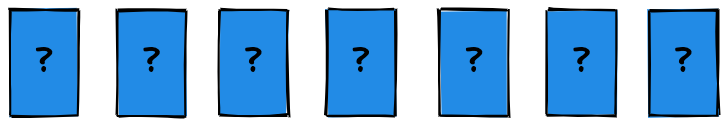

## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

 The first step is to state the problem clearly and precisely in abstract terms. 

<img src="https://i.imgur.com/mazym6s.png" width="480">

In this case, for instance, we can represent the sequence of cards as a list of numbers. Turning over a specific card is equivalent to accessing the value of the number at the corresponding position the list. 

<img src="https://i.imgur.com/G9fBarb.png" width="600">

The problem can now be stated as follows:

#### Problem

> We need to write a program to find the position of a given number in a list of numbers arranged in decreasing order. We also need to minimize the number of times we access elements from the list.

#### Input

1. `cards`: A list of numbers sorted in decreasing order. E.g. `[13, 11, 10, 7, 4, 3, 1, 0]`
2. `query`: A number, whose position in the array is to be determined. E.g. `7`

#### Output

3. `position`: The position of `query` in the list `cards`. E.g. `3` in the above case (counting from `0`)



Based on the above, we can now create the signature of our function:

In [1]:
def locate_card(cards, query):
  pass

### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Before we start implementing our function, it would be useful to come up with some example inputs and outputs which we can use later to test out problem. We'll refer to them as *test cases*.

Here's the test case described in the example above.

In [2]:
cards= [13, 11, 10, 7, 4, 3, 1, 0]
query= 7
output= 3

In [3]:
result= locate_card(cards, query)
print(result)

None


In [4]:
result == output

False

In [5]:
#Above test case can be represented as:
test={
    'input':{
        'cards': [13, 11, 10, 7, 4, 3, 1, 0],
        'query': 7
    },
    'output': 3
}

In [6]:
#The fuction can also be tested as folows:
locate_card(test['input']['cards'],test['input']['query']) == test['output']

False

Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. The number `query` occurs somewhere in the middle of the list `cards`.
2. `query` is the first element in `cards`.
3. `query` is the last element in `cards`.
4. The list `cards` contains just one element, which is `query`.
5. The list `cards` does not contain number `query`.
6. The list `cards` is empty.
7. The list `cards` contains repeating numbers.
8. The number `query` occurs at more than one position in `cards`.
9. (can you think of any more variations?)

> **Edge Cases**: It's likely that you didn't think of all of the above cases when you read the problem for the first time. Some of these (like the empty array or `query` not occurring in `cards`) are called *edge cases*, as they represent rare or extreme examples. 

While edge cases may not occur frequently, your programs should be able to handle all edge cases, otherwise they may fail in unexpected ways. Let's create some more test cases for the variations listed above. We'll store all our test cases in an list for easier testing.

In [7]:
tests= []

In [8]:
#test case 1: query occurs in middle
tests.append(test)

tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0],
        'query': 1
    },
    'output': 6
})

In [9]:
#test case 2: query is the first element
tests.append({
    'input': {
        'cards': [4, 2, 1, -1],
        'query': 4
    },
    'output': 0
})

In [10]:
#test case 3: query is the last element
tests.append({
    'input': {
        'cards': [3, -1, -9, -127],
        'query': -127
    },
    'output': 3
})

In [11]:
#test case 4: cards contains just one element, query
tests.append({
    'input': {
        'cards': [6],
        'query': 6
    },
    'output': 0 
})

In [12]:
#We will assume that our function will return -1 in case cards does not contain query.

In [13]:
#test case 5: cards does not contain query 
tests.append({
    'input': {
        'cards': [9, 7, 5, 2, -9],
        'query': 4
    },
    'output': -1
})

In [14]:
#test case 5: cards is empty
tests.append({
    'input': {
        'cards': [],
        'query': 7
    },
    'output': -1
})

In [15]:
#test case 6: numbers can repeat in cards
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 3
    },
    'output': 7
})

In [16]:
#In the case where query occurs multiple times in cards, we'll expect our function to return the first occurrence of query.
#test case 7: query occurs multiple times
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 6
    },
    'output': 2
})

In [17]:
#full set of test cases 
tests

[{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 3},
 {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}, 'output': 6},
 {'input': {'cards': [4, 2, 1, -1], 'query': 4}, 'output': 0},
 {'input': {'cards': [3, -1, -9, -127], 'query': -127}, 'output': 3},
 {'input': {'cards': [6], 'query': 6}, 'output': 0},
 {'input': {'cards': [9, 7, 5, 2, -9], 'query': 4}, 'output': -1},
 {'input': {'cards': [], 'query': 7}, 'output': -1},
 {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 3},
  'output': 7},
 {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
   'query': 6},
  'output': 2}]

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may necessarily be the most _efficient_ solution. The simplest or most obvious solution to a problem, which generally involves checking all possible answers is called the _brute force_ solution.

In this problem, coming up with a correct solution is quite easy: Bob can simply turn over cards in order one by one, till he find a card with the given number on it. Here's how we might implement it:

1. Create a variable `position` with the value 0.
3. Check whether the number at index `position` in `card` equals `query`.
4. If it does, `position` is the answer and can be returned from the function
5. If not, increment the value of `position` by 1, and repeat steps 2 to 5 till we reach the last position.
6. If the number was not found, return `-1`.

> **Linear Search Algorithm**: Congratulations, we've just written our first _algorithm_! An algorithm is simply a list of statements which can be converted into code and executed by a computer on different sets of inputs. This particular algorithm is called linear search, since it involves searching through a list in a linear fashion i.e. element after element.



### 4. Implement the solution and test it using example inputs. Fix bugs, if any.

We now exactly what we want our function to do, and we have an easy way of testing it on a variety of inputs.

Here's a first attempt at implementing the function.

In [18]:
def locate_cards(cards, query):
  #Creat a variable position with the value 0.
  position = 0

  while True:

    #check if element at the current position match the query
    if cards[position] == query:
      return position
    
    position += 1
    
    #check if we have reached the end of the array
    if position == len(cards):
      return -1

#if we run this function then we will have an error when the list is empty. Hence below code is used for each condition.

In [19]:
def locate_cards(cards, query):
  #Create a variable position with the value 0.
  position = 0

  while position<len(cards):

    #check if element at the current position match the query
    if cards[position] == query:
      return position
    
    position += 1
    
  #check if we have reached the end of the array
  else:
      return -1

In [20]:
test={
    'input':{
        'cards': [17, 13, 11, 10, 7, 4, 3, 1, 0],
        'query': 7
    },
    'output': 4
}

In [21]:
test

{'input': {'cards': [17, 13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 4}

In [22]:
result= locate_cards(test['input']['cards'],test['input']['query'])
result

4

In [23]:
result == test['output']

True

In [24]:
#Trying the same function on different test cases:

In [25]:
tests[0]

{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 3}

In [26]:
result0= locate_cards(tests[0]['input']['cards'],tests[0]['input']['query'])
result0

3

In [27]:
tests[1]

{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}, 'output': 6}

In [28]:
result1= locate_cards(tests[1]['input']['cards'],tests[1]['input']['query'])
result1

6

In [29]:
tests[2]

{'input': {'cards': [4, 2, 1, -1], 'query': 4}, 'output': 0}

In [30]:
result2= locate_cards(tests[2]['input']['cards'],tests[2]['input']['query'])
result2

0

In [31]:
tests[3]

{'input': {'cards': [3, -1, -9, -127], 'query': -127}, 'output': 3}

In [32]:
result3= locate_cards(tests[3]['input']['cards'],tests[3]['input']['query'])
result3

3

In [33]:
tests[4]

{'input': {'cards': [6], 'query': 6}, 'output': 0}

In [34]:
result4= locate_cards(tests[4]['input']['cards'],tests[4]['input']['query'])
result4

0

In [35]:
tests[5]

{'input': {'cards': [9, 7, 5, 2, -9], 'query': 4}, 'output': -1}

In [36]:
result5= locate_cards(tests[5]['input']['cards'],tests[5]['input']['query'])
result5

-1

In [37]:
tests[6]

{'input': {'cards': [], 'query': 7}, 'output': -1}

In [38]:
result6= locate_cards(tests[6]['input']['cards'],tests[6]['input']['query'])
result6

-1

###5. Analyze the algorithm's complexity and identify inefficiencies, if any.

Before we can minimize the number, we need a way to measure it. Since we access a list element once in every iteration, for a list of size N we access the elements from the list up to N times. Thus, Bob may need to overturn up to N cards in the worst case, to find the required card.

The field of study concerned with finding the amount of time, space or other resources required to complete the execution of computer programs is called the analysis of algorithms. And the process of figuring out the best algorithm to solve a given problem is called algorithm design and optimization.

###Complexity and Big O Notation
Complexity of an algorithm is a measure of the amount of time and/or space required by an algorithm for an input of a given size e.g. N. Unless otherwise stated, the term complexity always refers to the worst-case complexity (i.e. the highest possible time/space taken by the program/algorithm to process an input).

In the case of linear search:

1. The time complexity of the algorithm is cN for some fixed constant c that depends on the number of operations we perform in each iteration and the time taken to execute a statement. Time complexity is sometimes also called the running time of the algorithm.

2. The space complexity is some constant c' (independent of N), since we just need a single variable position to iterate through the array, and it occupies a constant space in the computer's memory (RAM).

Big O Notation:

Worst-case complexity is often expressed using the Big O notation. In the Big O, we drop fixed constants and lower powers of variables to capture the trend of relationship between the size of the input and the complexity of the algorithm i.e. if the complexity of the algorithm is cN^3 + dN^2 + eN + f, in the Big O notation it is expressed as O(N^3)

Thus, the time complexity of linear search is O(N) and its space complexity is O(1).






### 7. Come up with a correct solution for the problem. State it in plain English.

####Binary Search

It is used when:
1. We have sorted array.
2. We need to do comparisons.

Here's how binary search can be applied to our problem:

1. Find the middle element of the list.
2. If it matches queried number, return the middle position as the answer.
3. If it is less than the queried number, then search the first half of the list
3. If it is greater than the queried number, then search the second half of the list
4. If no more elements remain, return -1.


### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

In [39]:
l= [12,45,26,63,96,55,41,89,42,67,5]

In [40]:
l.sort(reverse=True)

In [41]:
l

[96, 89, 67, 63, 55, 45, 42, 41, 26, 12, 5]

In [42]:
len(l)

11

In [43]:
11/2, 11//2 # '//' is used to return integer number.

(5.5, 5)

In [44]:
def detect_card_position (cards,query):
  
  cards.sort(reverse=True)
  lo, hi= 0, len(cards)-1

  while lo <= hi:
    mid = (lo + hi) // 2 
    mid_number= cards[mid]
    
    print('lo:', lo, 'hi:', hi, 'mid:', mid, 'mid_number:', mid_number )

    if mid_number == query:
      return mid_number
    elif mid_number < query:
      hi = mid - 1
    elif mid_number > query:
      lo = mid + 1
  
  return -1

In [45]:
test_data1= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 26
}

In [46]:
test_data1['cards']

[12, 45, 26, 63, 96, 55, 41, 89, 42, 67, 5]

In [47]:
test_result1= detect_card_position(test_data1['cards'], test_data1['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 6 hi: 10 mid: 8 mid_number: 26


In [48]:
test_data1['cards']

[96, 89, 67, 63, 55, 45, 42, 41, 26, 12, 5]

In [49]:
#That means after passing the test data1 value in the fuction we get cards in descending order.

In [50]:
test_result1

26

In [51]:
test_data2= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 89
}

In [52]:
test_result2= detect_card_position(test_data2['cards'], test_data2['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 0 hi: 4 mid: 2 mid_number: 67
lo: 0 hi: 1 mid: 0 mid_number: 96
lo: 1 hi: 1 mid: 1 mid_number: 89


In [53]:
test_data3= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 41
}

In [54]:
test_result3= detect_card_position(test_data3['cards'], test_data3['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 6 hi: 10 mid: 8 mid_number: 26
lo: 6 hi: 7 mid: 6 mid_number: 42
lo: 7 hi: 7 mid: 7 mid_number: 41


In [55]:
test_result3

41

In [56]:
test_data4= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 5
}

In [57]:
test_result4= detect_card_position(test_data4['cards'], test_data4['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 6 hi: 10 mid: 8 mid_number: 26
lo: 9 hi: 10 mid: 9 mid_number: 12
lo: 10 hi: 10 mid: 10 mid_number: 5


In [58]:
test_result4

5

In [59]:
test_data5= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 12
}

In [60]:
test_result5= detect_card_position(test_data5['cards'], test_data5['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 6 hi: 10 mid: 8 mid_number: 26
lo: 9 hi: 10 mid: 9 mid_number: 12


In [61]:
test_result5

12

In [62]:
test_data6= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 43
}

In [63]:
test_result6= detect_card_position(test_data6['cards'], test_data6['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45
lo: 6 hi: 10 mid: 8 mid_number: 26
lo: 6 hi: 7 mid: 6 mid_number: 42


In [64]:
test_result6

-1

In [65]:
test_data7= {
    'cards': [12,45,26,63,96,55,41,89,42,67,5],
    'query': 45
}

In [66]:
test_result7= detect_card_position(test_data7['cards'], test_data7['query'])

lo: 0 hi: 10 mid: 5 mid_number: 45


In [67]:
test_result7

45

In [68]:
#Repeating the number:
test_data8= {
    'cards': [12,45,26,63,42,96,55,41,89,42,67,5],
    'query': 42
}

test_result8= detect_card_position(test_data8['cards'], test_data8['query'])

test_result8


lo: 0 hi: 11 mid: 5 mid_number: 45
lo: 6 hi: 11 mid: 8 mid_number: 41
lo: 6 hi: 7 mid: 6 mid_number: 42


42

In [69]:
#What if query number repeats and we need to find out what is the least index of the repeating query number: 

In [70]:
#We'll define a helper function called test_location, which will take the list cards, the query and mid as inputs.

In [71]:
def test_location(cards, query, mid):
  mid_number= cards[mid]
  print('mid:', mid, 'mid number:', mid_number)

  if mid_number == query:
    if mid-1 >= 0 and cards[mid-1] == query:
      return 'left'
    else:
      return 'found'
  elif mid_number > query:
    return 'right'
  else:
    return 'left' 

In [72]:
def grab_query_position(cards, query):
  cards.sort(reverse=True)
  
  lo, hi= 0, len(cards)-1

  while lo <= hi:
    mid = (lo + hi) // 2
    print('lo:', lo, 'hi:', hi)
    result = test_location(cards, query, mid)

    if result == 'found':
      return mid
    elif result == 'right':
      lo = mid + 1
    elif result == 'left':
      hi = mid - 1

  return -1

In [73]:
test_data9= {
    'cards': [42,12,45,26,42,63,42,96,55,42,41,89,42,67,5,42],
    'query': 42
}


In [74]:
test_data9

{'cards': [42, 12, 45, 26, 42, 63, 42, 96, 55, 42, 41, 89, 42, 67, 5, 42],
 'query': 42}

In [75]:
test_result9= grab_query_position(test_data9['cards'], test_data9['query'])

lo: 0 hi: 15
mid: 7 mid number: 42
lo: 0 hi: 6
mid: 3 mid number: 63
lo: 4 hi: 6
mid: 5 mid number: 45
lo: 6 hi: 6
mid: 6 mid number: 42


In [76]:
test_result9

6

In [77]:
test_data9['cards']

[96, 89, 67, 63, 55, 45, 42, 42, 42, 42, 42, 42, 41, 26, 12, 5]

### 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

Once again, let's try to count the number of iterations in the algorithm. If we start out with an array of N elements, then each time the size of the array reduces to half for the next iteration, until we are left with just 1 element.

Initial length - `N`

Iteration 1 - `N/2`

Iteration 2 - `N/4` i.e. `N/2^2`

Iteration 3 - `N/8` i.e. `N/2^3`

...

Iteration k - `N/2^k`


Since the final length of the array is 1, we can find the 

`N/2^k = 1`

Rearranging the terms, we get

`N = 2^k`

Taking the logarithm

`k = log N`

Where `log` refers to log to the base 2. Therefore, our algorithm has the time complexity **O(log N)**. This fact is often stated as: binary search _runs_ in logarithmic time. You can verify that the space complexity of binary search is **O(1)**.





## Generic Binary Search

Here is the general strategy behind binary search, which is applicable to a variety of problems:

1. Come up with a condition to determine whether the answer lies before, after or at a given position
1. Retrieve the midpoint and the middle element of the list.
2. If it is the answer, return the middle position as the answer.
3. If answer lies before it, repeat the search with the first half of the list
4. If the answer lies after it, repeat the search with the second half of the list.

Here is the generic algorithm for binary search, implemented in Python:

In [78]:
def binary_search(lo, hi, condition):
    
    while lo <= hi:
      mid = (lo + hi) // 2
      print('lo:', lo, 'hi:', hi)
      result = condition(mid)
      if result == 'found':
        return mid
      elif result == 'left':
        hi = mid - 1
      else:
        lo = mid + 1
    return -1

In [79]:
def locate_card(cards, query):
    
    def condition(mid):
      mid_number= cards[mid]
      print('mid:', mid, 'mid number:', mid_number)
      if cards[mid] == query:
        if mid-1 > 0 and cards[mid-1] == query:
          return 'left'
        else:
          return 'found'
      elif cards[mid] < query:
          return 'left'
      else:
          return 'right'
    
    return binary_search(0, len(cards) - 1, condition)

In [80]:
test_data9

{'cards': [96, 89, 67, 63, 55, 45, 42, 42, 42, 42, 42, 42, 41, 26, 12, 5],
 'query': 42}

In [81]:
test_result9= locate_card(test_data9['cards'], test_data9['query'])

lo: 0 hi: 15
mid: 7 mid number: 42
lo: 0 hi: 6
mid: 3 mid number: 63
lo: 4 hi: 6
mid: 5 mid number: 45
lo: 6 hi: 6
mid: 6 mid number: 42


In [82]:
test_result9

6

###Question:
Given an array of integers nums sorted in ascending order, find the starting and ending position of a given number.

This differs from the problem in only two significant ways:

1. The numbers are sorted in increasing order.
2. We are looking for both the increasing order and the decreasing order.

The Naive Approach is to run a for loop and check given elements in an array.  

1. Run a for loop and for i = 0 to n-1
2. Take first = -1 and last = -1 
3. When we find element first time then we update first = i 
4. We always update last=i whenever we find the element.
5. We print first and last.

In [83]:
def locate_first_position(nums, target):
  (lo, hi) = (0, len(nums)-1)
  
  while lo<=hi:
    mid = (lo + hi) // 2
    mid_number= nums[mid]
    print('lo:', lo, 'hi:', hi)
    print('mid:', mid, 'mid number:', mid_number)
    if nums[mid] == target:
      if  mid>0 and nums[mid-1] == target:
        hi =  mid-1
      else:
        return mid
    elif nums[mid] < target:
        lo = mid+1
    else:
        hi = mid-1
  return -1 

In [84]:
def locate_last_position(nums, target):
  (lo, hi) = (0, len(nums)-1)
  
  while lo<=hi:
    mid = (lo + hi) // 2
    mid_number= nums[mid]
    print('lo:', lo, 'hi:', hi)
    print('mid:', mid, 'mid number:', mid_number)
    if nums[mid] == target:
      if  mid<len(nums)-1 and nums[mid+1] == target:
        lo = mid + 1
      else:
        return mid
    elif nums[mid] < target:
        lo = mid+1
    else:
        hi = mid-1
  return -1

In [85]:
def first_and_last_position(nums, target):
  nums.sort()
  return [locate_first_position(nums, target),locate_last_position(nums, target)]

In [86]:
test_data10={
    'nums':[22,12,43,98,65,22,54,14,22,16,22,7,22,104,76,22],
    'target': 22
}

In [87]:
test_data10

{'nums': [22, 12, 43, 98, 65, 22, 54, 14, 22, 16, 22, 7, 22, 104, 76, 22],
 'target': 22}

In [88]:
test_result10= first_and_last_position(test_data10['nums'], test_data10['target'])

lo: 0 hi: 15
mid: 7 mid number: 22
lo: 0 hi: 6
mid: 3 mid number: 16
lo: 4 hi: 6
mid: 5 mid number: 22
lo: 4 hi: 4
mid: 4 mid number: 22
lo: 0 hi: 15
mid: 7 mid number: 22
lo: 8 hi: 15
mid: 11 mid number: 54
lo: 8 hi: 10
mid: 9 mid number: 22


In [89]:
test_result10

[4, 9]

In [90]:
test_data10

{'nums': [7, 12, 14, 16, 22, 22, 22, 22, 22, 22, 43, 54, 65, 76, 98, 104],
 'target': 22}

# **Problem - Rotated Lists**

You are given list of numbers, obtained by rotating a sorted list an unknown number of times. Write a function to determine the minimum number of times the original sorted list was rotated to obtain the given list. Your function should have the worst-case complexity of O(log N), where N is the length of the list. You can assume that all the numbers in the list are unique.

Example: The list [5, 6, 9, 0, 2, 3, 4] was obtained by rotating the sorted list [0, 2, 3, 4, 5, 6, 9] 3 times.

We define "rotating a list" as removing the last element of the list and adding it before the first element. E.g. rotating the list [3, 2, 4, 1] produces [1, 3, 2, 4].

"Sorted list" refers to a list where the elements are arranged in the increasing order e.g. [1, 3, 5, 7].

###1. State the problem clearly. Identify the input & output formats.

Here, we have to find the minimum number of rotations done in a given sorted list to obtain a given rotated list.

In [91]:
def count_rotations(nums):
  pass

###2. Come up with some example inputs & outputs. Try to cover all edge cases.
Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. A list of size 10 rotated 3 times.
2. A list of size 8 rotated 5 times.
3. A list that wasn't rotated at all.
4. A list that was rotated just once.
5. A list that was rotated n-1 times, where n is the size of the list.
6. A list that was rotated n times (do you get back the original list here?)
7. An empty list.
8. A list containing just one element.

We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: input (a dictionary itself containing one key for each argument to the function and output (the expected result from the function). Here's an example.

In [92]:
# A list of size 8 rotated 5 times.
test_1= {
    'input': [4,5,6,7,8,1,2,3],
    'output': 5
}
test_1

{'input': [4, 5, 6, 7, 8, 1, 2, 3], 'output': 5}

In [93]:
# A list wasn't rotated at all.
test_2= {
    'input': [1,2,3,4,5,6,7,8],
    'output': 0
}
test_2

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [94]:
# A list rotated once.
test_3= {
    'input': [8,1,2,3,4,5,6,7],
    'output': 1
}
test_3

{'input': [8, 1, 2, 3, 4, 5, 6, 7], 'output': 1}

In [95]:
# A list that was rotated n-1 times, where n is the size of the list..
test_4= {
    'input': [2,3,4,5,6,7,8,1],
    'output': 7
}
test_4

{'input': [2, 3, 4, 5, 6, 7, 8, 1], 'output': 7}

In [96]:
# A list that was rotated n times, where n is the size of the list..
test_5= {
    'input': [1,2,3,4,5,6,7,8],
    'output': 0
}
test_5

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [97]:
# An Emplty list..
test_6= {
    'input': [],
    'output': 0
}
test_6

{'input': [], 'output': 0}

In [98]:
# A list containing just one element..
test_7= {
    'input': [5],
    'output': 0
}
test_7

{'input': [5], 'output': 0}

In [99]:
tests= [test_1, test_2, test_3, test_4, test_5, test_6, test_7]

In [100]:
tests

[{'input': [4, 5, 6, 7, 8, 1, 2, 3], 'output': 5},
 {'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0},
 {'input': [8, 1, 2, 3, 4, 5, 6, 7], 'output': 1},
 {'input': [2, 3, 4, 5, 6, 7, 8, 1], 'output': 7},
 {'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0},
 {'input': [], 'output': 0},
 {'input': [5], 'output': 0}]

# 3. Come up with a correct solution for the problem. State it in plain English.
Our first goal should always be to come up with a correct solution to the problem, which may not necessarily be the most efficient solution. Try to think of a solution before you read further.

Coming up with the correct solution is quite easy, and it's based on this insight: If a list of sorted numbers is rotated k times, then the smallest number in the list ends up at position k (counting from 0). Further, it is the only number in the list which is smaller than the number before it. Thus, we simply need to check for each number in the list whether it is smaller than the number that comes before it (if there is a number before it). Then, our answer i.e. the number of rotations is simply the position of this number is . If we cannot find such a number, then the list wasn't rotated at all.

Example: In the list [19, 25, 29, 3, 5, 6, 7, 9, 11, 14], the number 3 is the only number smaller than its predecessor. It occurs at the position 4 (counting from 0), hence the array was rotated 3 times.

We can use the linear search algorithm as a first attempt to solve this problem i.e. we can perform the check for every position one by one.

# Q (Optional): Describe the linear search solution explained above problem in your own words.

1. Create a variable position with value 1.
2. Compare the number at current position to the number before it.
3. If the number is smaller than its predecessor, then return position.
4. Otherwise, increment position and repeat till we exhaust all the numbers.  

In [101]:
def count_rotations_linear(nums):
  position= 0

  while position<len(nums):
    if position>0 and nums[position]<nums[position-1]:
      return position
    
    position += 1
  
  return 0

In [102]:
test_1

{'input': [4, 5, 6, 7, 8, 1, 2, 3], 'output': 5}

In [103]:
result_1= count_rotations_linear(test_1['input'])

In [104]:
result_1

5

In [105]:
test_2

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [106]:
result_2= count_rotations_linear(test_2['input'])
result_2

0

In [107]:
test_3

{'input': [8, 1, 2, 3, 4, 5, 6, 7], 'output': 1}

In [108]:
result_3= count_rotations_linear(test_3['input'])
result_3

1

In [109]:
test_4

{'input': [2, 3, 4, 5, 6, 7, 8, 1], 'output': 7}

In [110]:
result_4= count_rotations_linear(test_4['input'])
result_4

7

In [111]:
test_5

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [112]:
result_5= count_rotations_linear(test_5['input'])
result_5

0

In [113]:
test_6

{'input': [], 'output': 0}

In [114]:
result_6= count_rotations_linear(test_6['input'])
result_6

0

In [115]:
test_7

{'input': [5], 'output': 0}

In [116]:
result_7= count_rotations_linear(test_7['input'])
result_7

0

In [117]:
linear_search_complexity= 'O(N)'

### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

As you might have guessed, we can apply _Binary Search_ to solve this problem. The key question we need to answer in binary search is: Given the middle element, how to decide if it is the answer (smallest number), or whether the answer lies to the left or right of it. 

If the middle element is smaller than its predecessor, then it is the answer. However, if it isn't, this check is not sufficient to determine whether the answer lies to the left or the right of it. Consider the following examples.

`[7, 8, 1, 3, 4, 5, 6]` (answer lies to the left of the middle element)

`[1, 2, 3, 4, 5, -1, 0]` (answer lies to the right of the middle element)

Here's a check that will help us determine if the answer lies to the left or the right: _If the middle element of the list is smaller than the last element of the range, then the answer lies to the left of it. Otherwise, the answer lies to the right._

# 7. Implement the solution and test it using example inputs. Fix bugs, if any.

In [195]:
def count_rotations_binary(nums):
  (lo, hi)= (0, len(nums)-1)

  while lo <= hi:
    mid= (lo+hi) // 2
    mid_num= nums[mid]
    print('lo:', lo, 'hi:', hi)
    print('mid:', mid, 'mid_num:', mid_num)

    if mid>0 and nums[mid]<nums[mid-1]:
      return mid
    elif mid>0 and nums[mid]>nums[len(nums)-1]:
      lo = mid+1
    else:
      hi = mid-1
  
  return 0

In [196]:
test_1

{'input': [4, 5, 6, 7, 8, 1, 2, 3], 'output': 5}

In [197]:
result_1b= count_rotations_binary(test_1['input'])
result_1b

lo: 0 hi: 7
mid: 3 mid_num: 7
lo: 4 hi: 7
mid: 5 mid_num: 1


5

In [198]:
test_2

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [199]:
result_2b= count_rotations_binary(test_2['input'])
result_2b

lo: 0 hi: 7
mid: 3 mid_num: 4
lo: 0 hi: 2
mid: 1 mid_num: 2
lo: 0 hi: 0
mid: 0 mid_num: 1


0

In [200]:
test_3

{'input': [8, 1, 2, 3, 4, 5, 6, 7], 'output': 1}

In [201]:
result_3b= count_rotations_binary(test_3['input'])
result_3b

lo: 0 hi: 7
mid: 3 mid_num: 3
lo: 0 hi: 2
mid: 1 mid_num: 1


1

In [202]:
test_4

{'input': [2, 3, 4, 5, 6, 7, 8, 1], 'output': 7}

In [203]:
result_4b= count_rotations_binary(test_4['input'])
result_4b

lo: 0 hi: 7
mid: 3 mid_num: 5
lo: 4 hi: 7
mid: 5 mid_num: 7
lo: 6 hi: 7
mid: 6 mid_num: 8
lo: 7 hi: 7
mid: 7 mid_num: 1


7

In [204]:
test_5

{'input': [1, 2, 3, 4, 5, 6, 7, 8], 'output': 0}

In [205]:
result_5b= count_rotations_binary(test_5['input'])
result_5b

lo: 0 hi: 7
mid: 3 mid_num: 4
lo: 0 hi: 2
mid: 1 mid_num: 2
lo: 0 hi: 0
mid: 0 mid_num: 1


0

In [206]:
test_6

{'input': [], 'output': 0}

In [207]:
result_6b= count_rotations_binary(test_6['input'])
result_6b

0

In [208]:
test_7

{'input': [5], 'output': 0}

In [209]:
result_7b= count_rotations_binary(test_7['input'])
result_7b

lo: 0 hi: 0
mid: 0 mid_num: 5


0

# 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [210]:
binary_search_complexity = 'O(log N)'